# 1.)   Imports


In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
!pip install kneed
from kneed import KneeLocator


# 2.) Reading Data



In [ ]:
#Read from database CSV file
# Load the CSV file
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/data4.csv')

Mounted at /content/drive


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = df.drop('id', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# 3.) Preprocessing

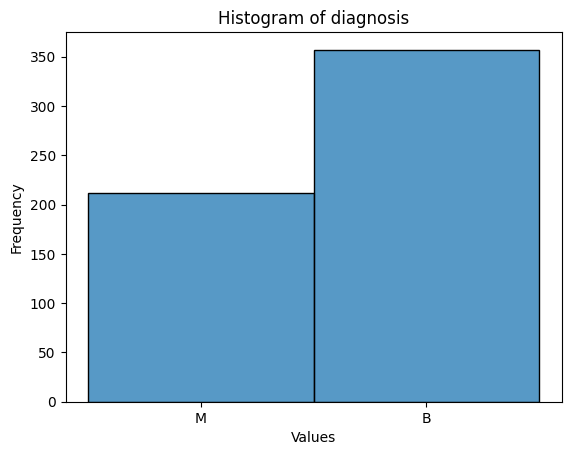

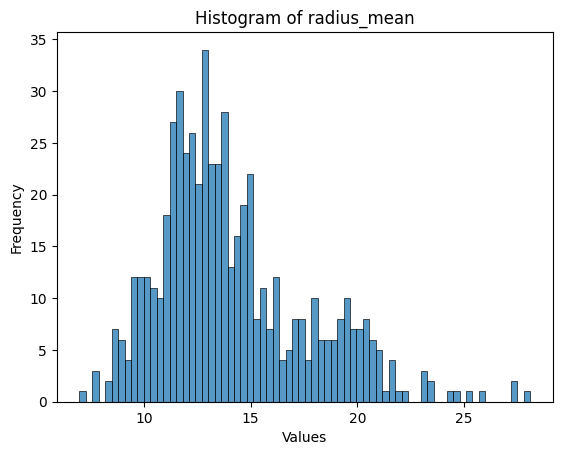

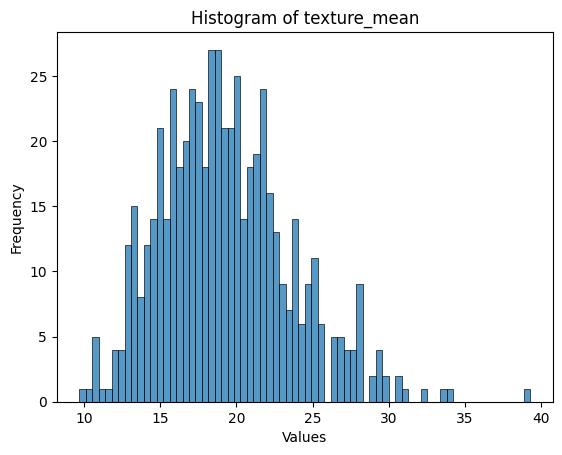

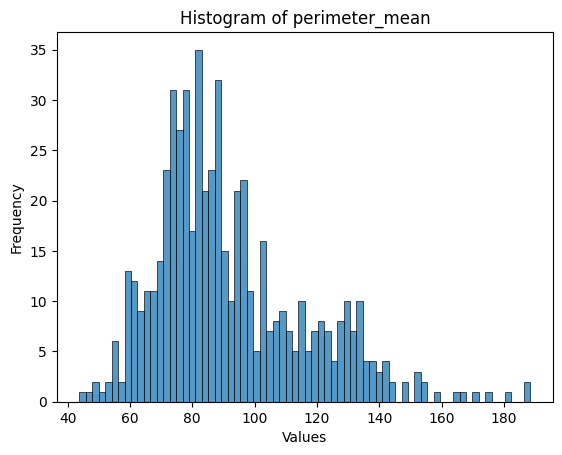

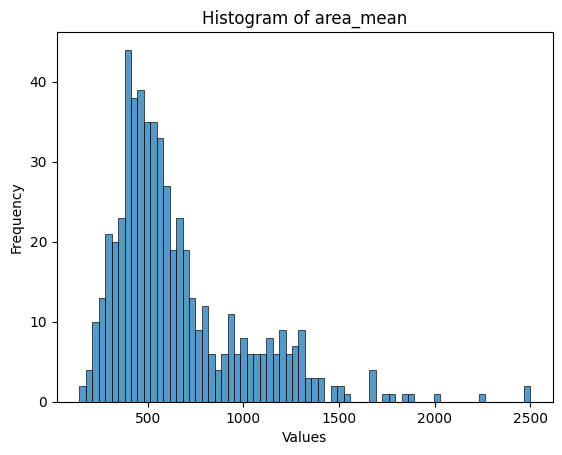

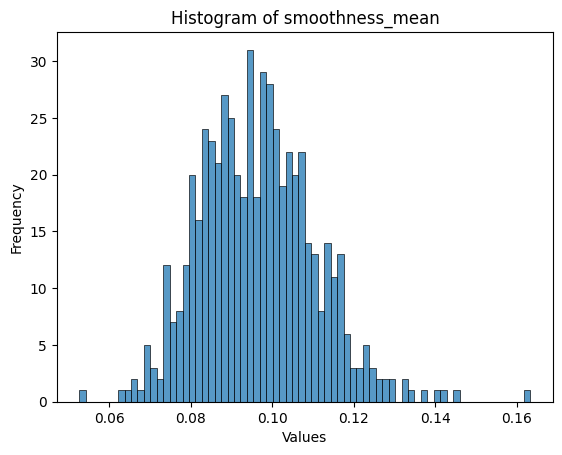

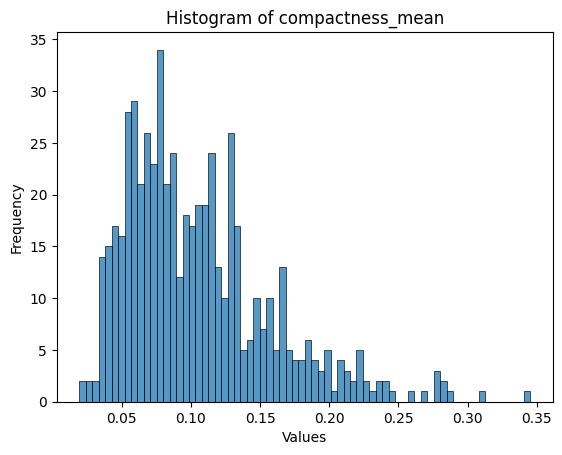

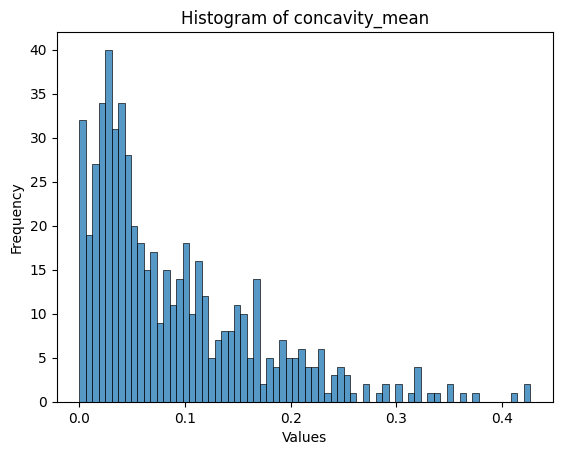

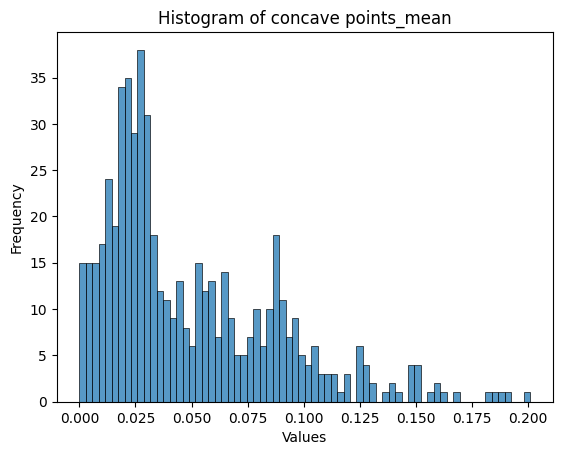

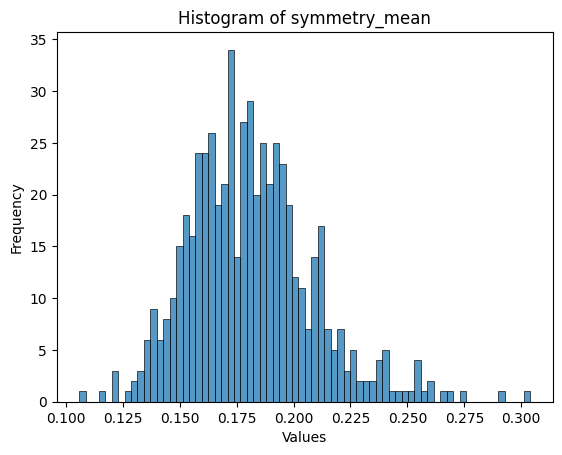

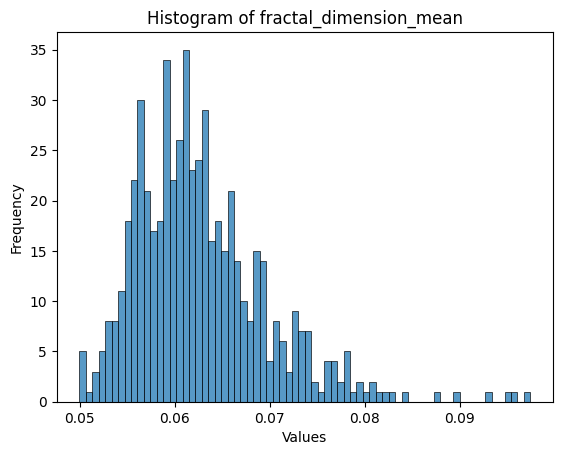

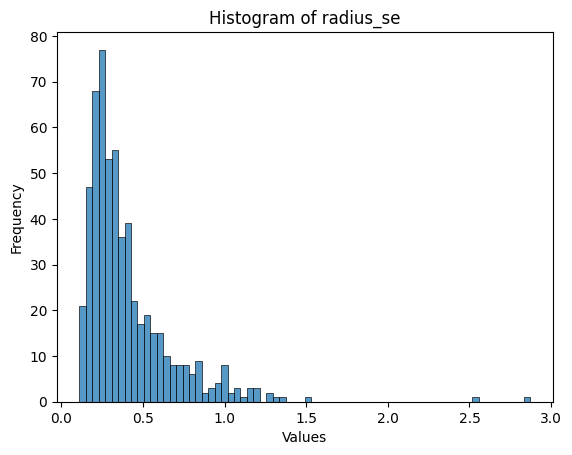

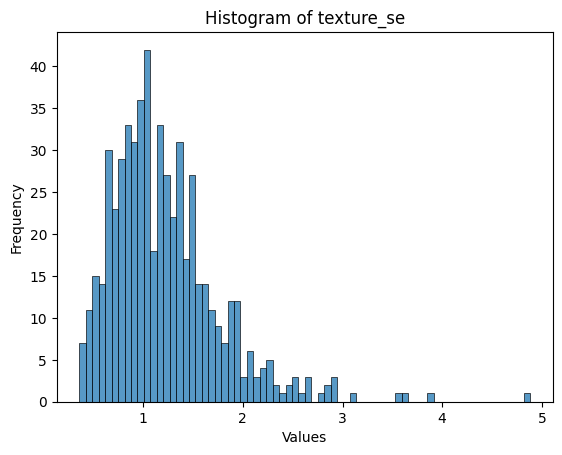

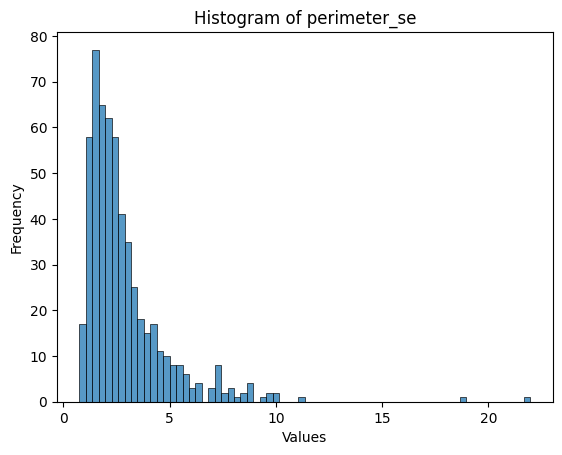

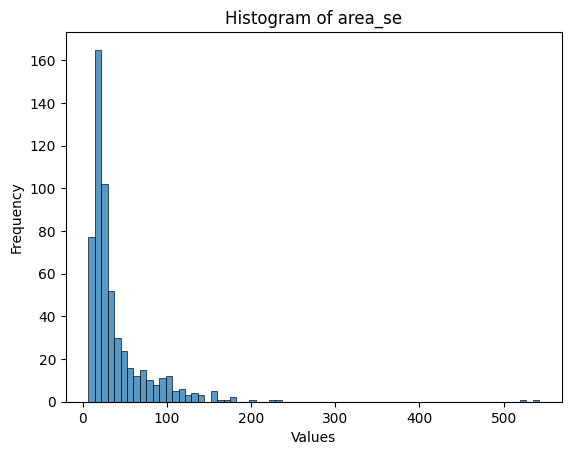

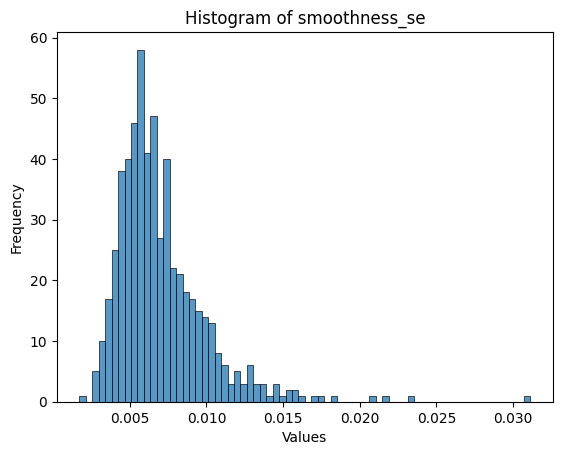

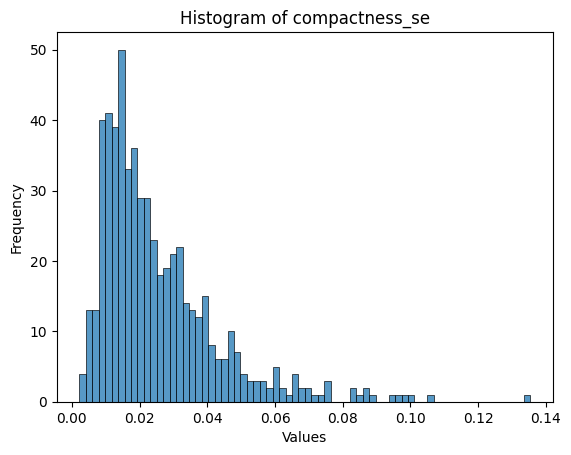

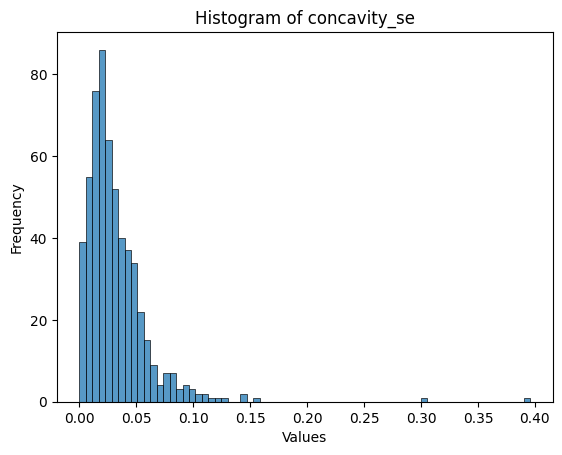

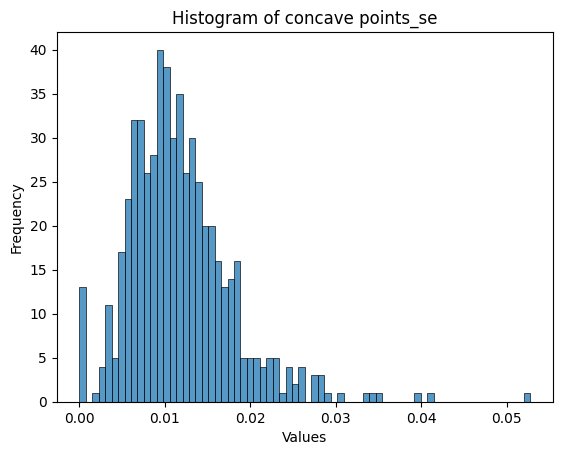

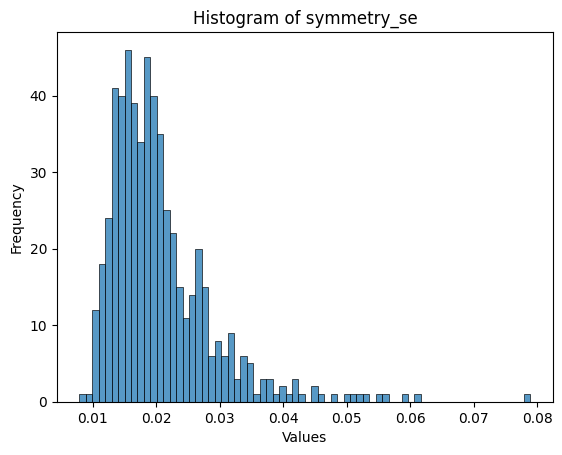

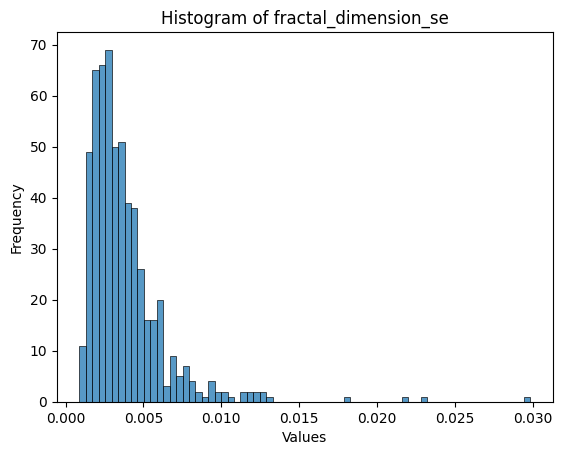

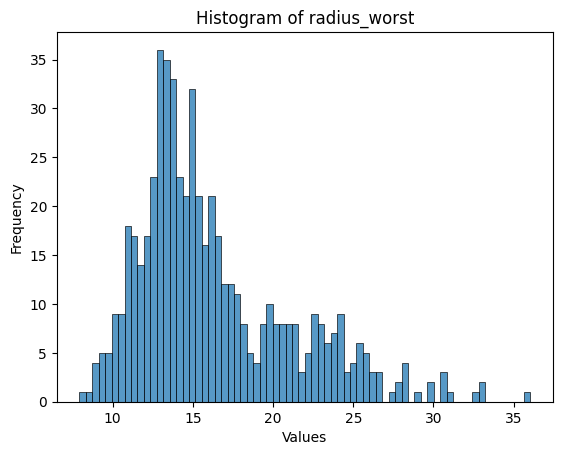

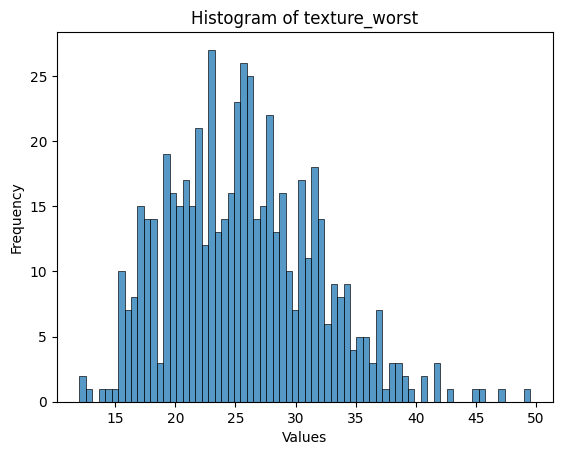

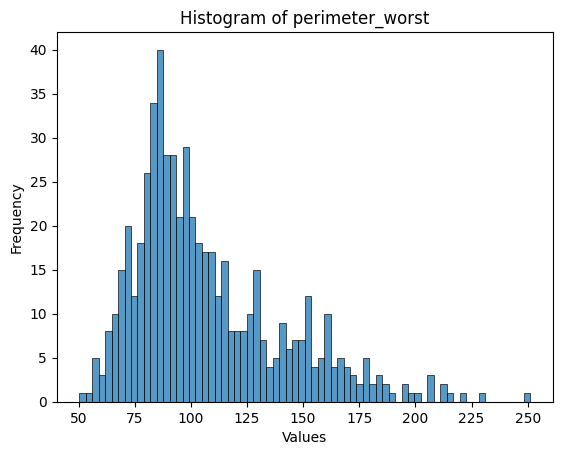

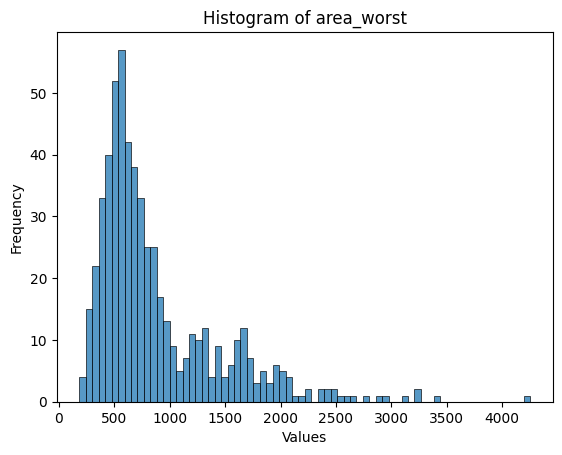

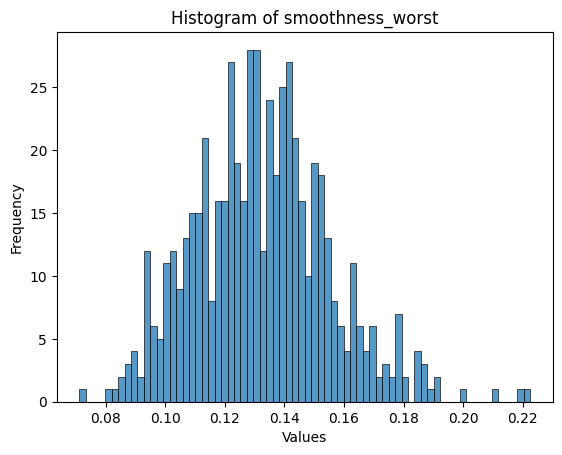

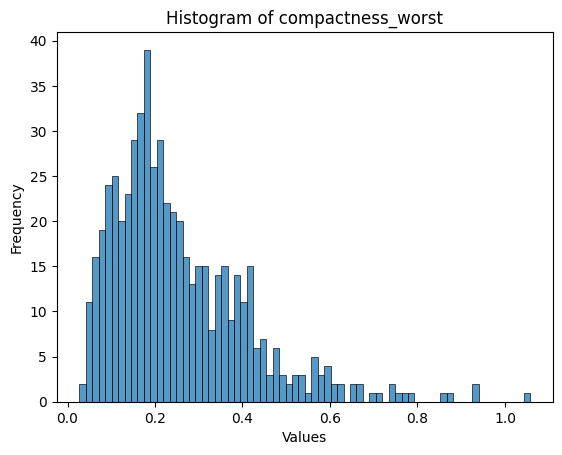

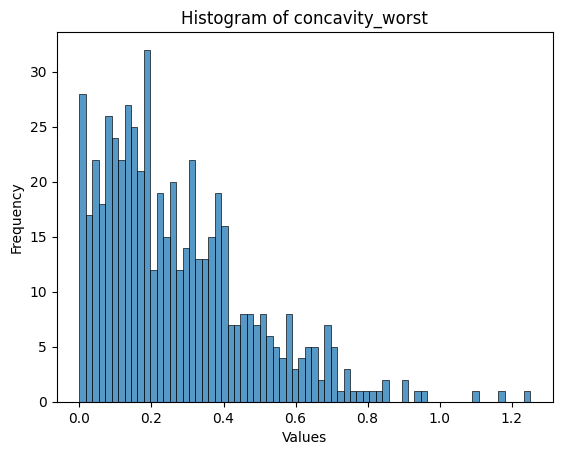

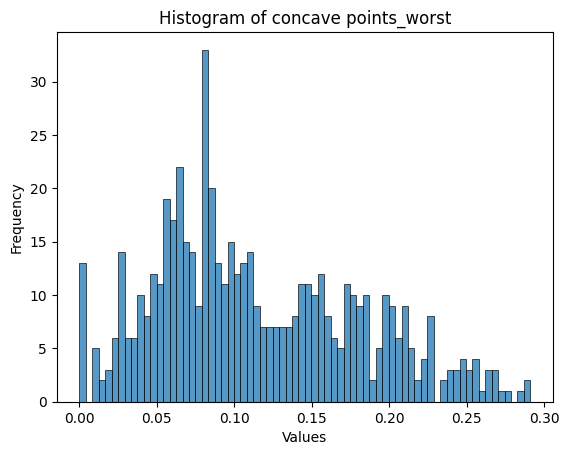

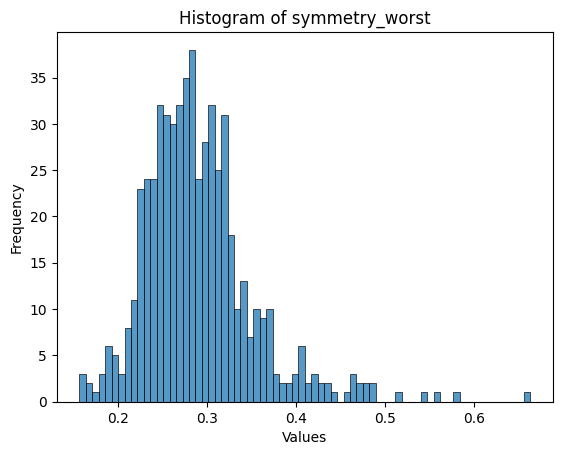

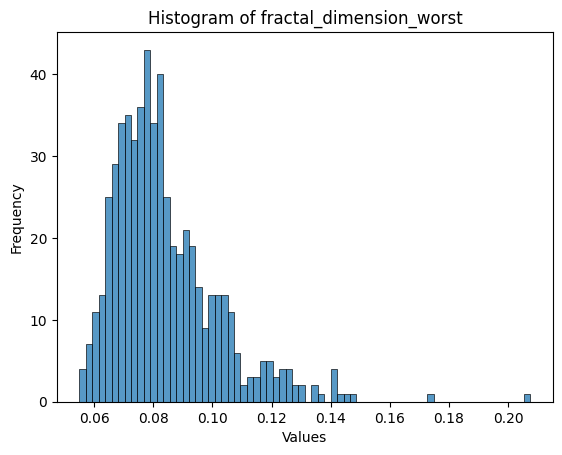

In [ ]:
for column in df.columns:
    sns.histplot(df[column], bins=70)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
X = df.drop("diagnosis", axis=1)
y = df['diagnosis'].copy()

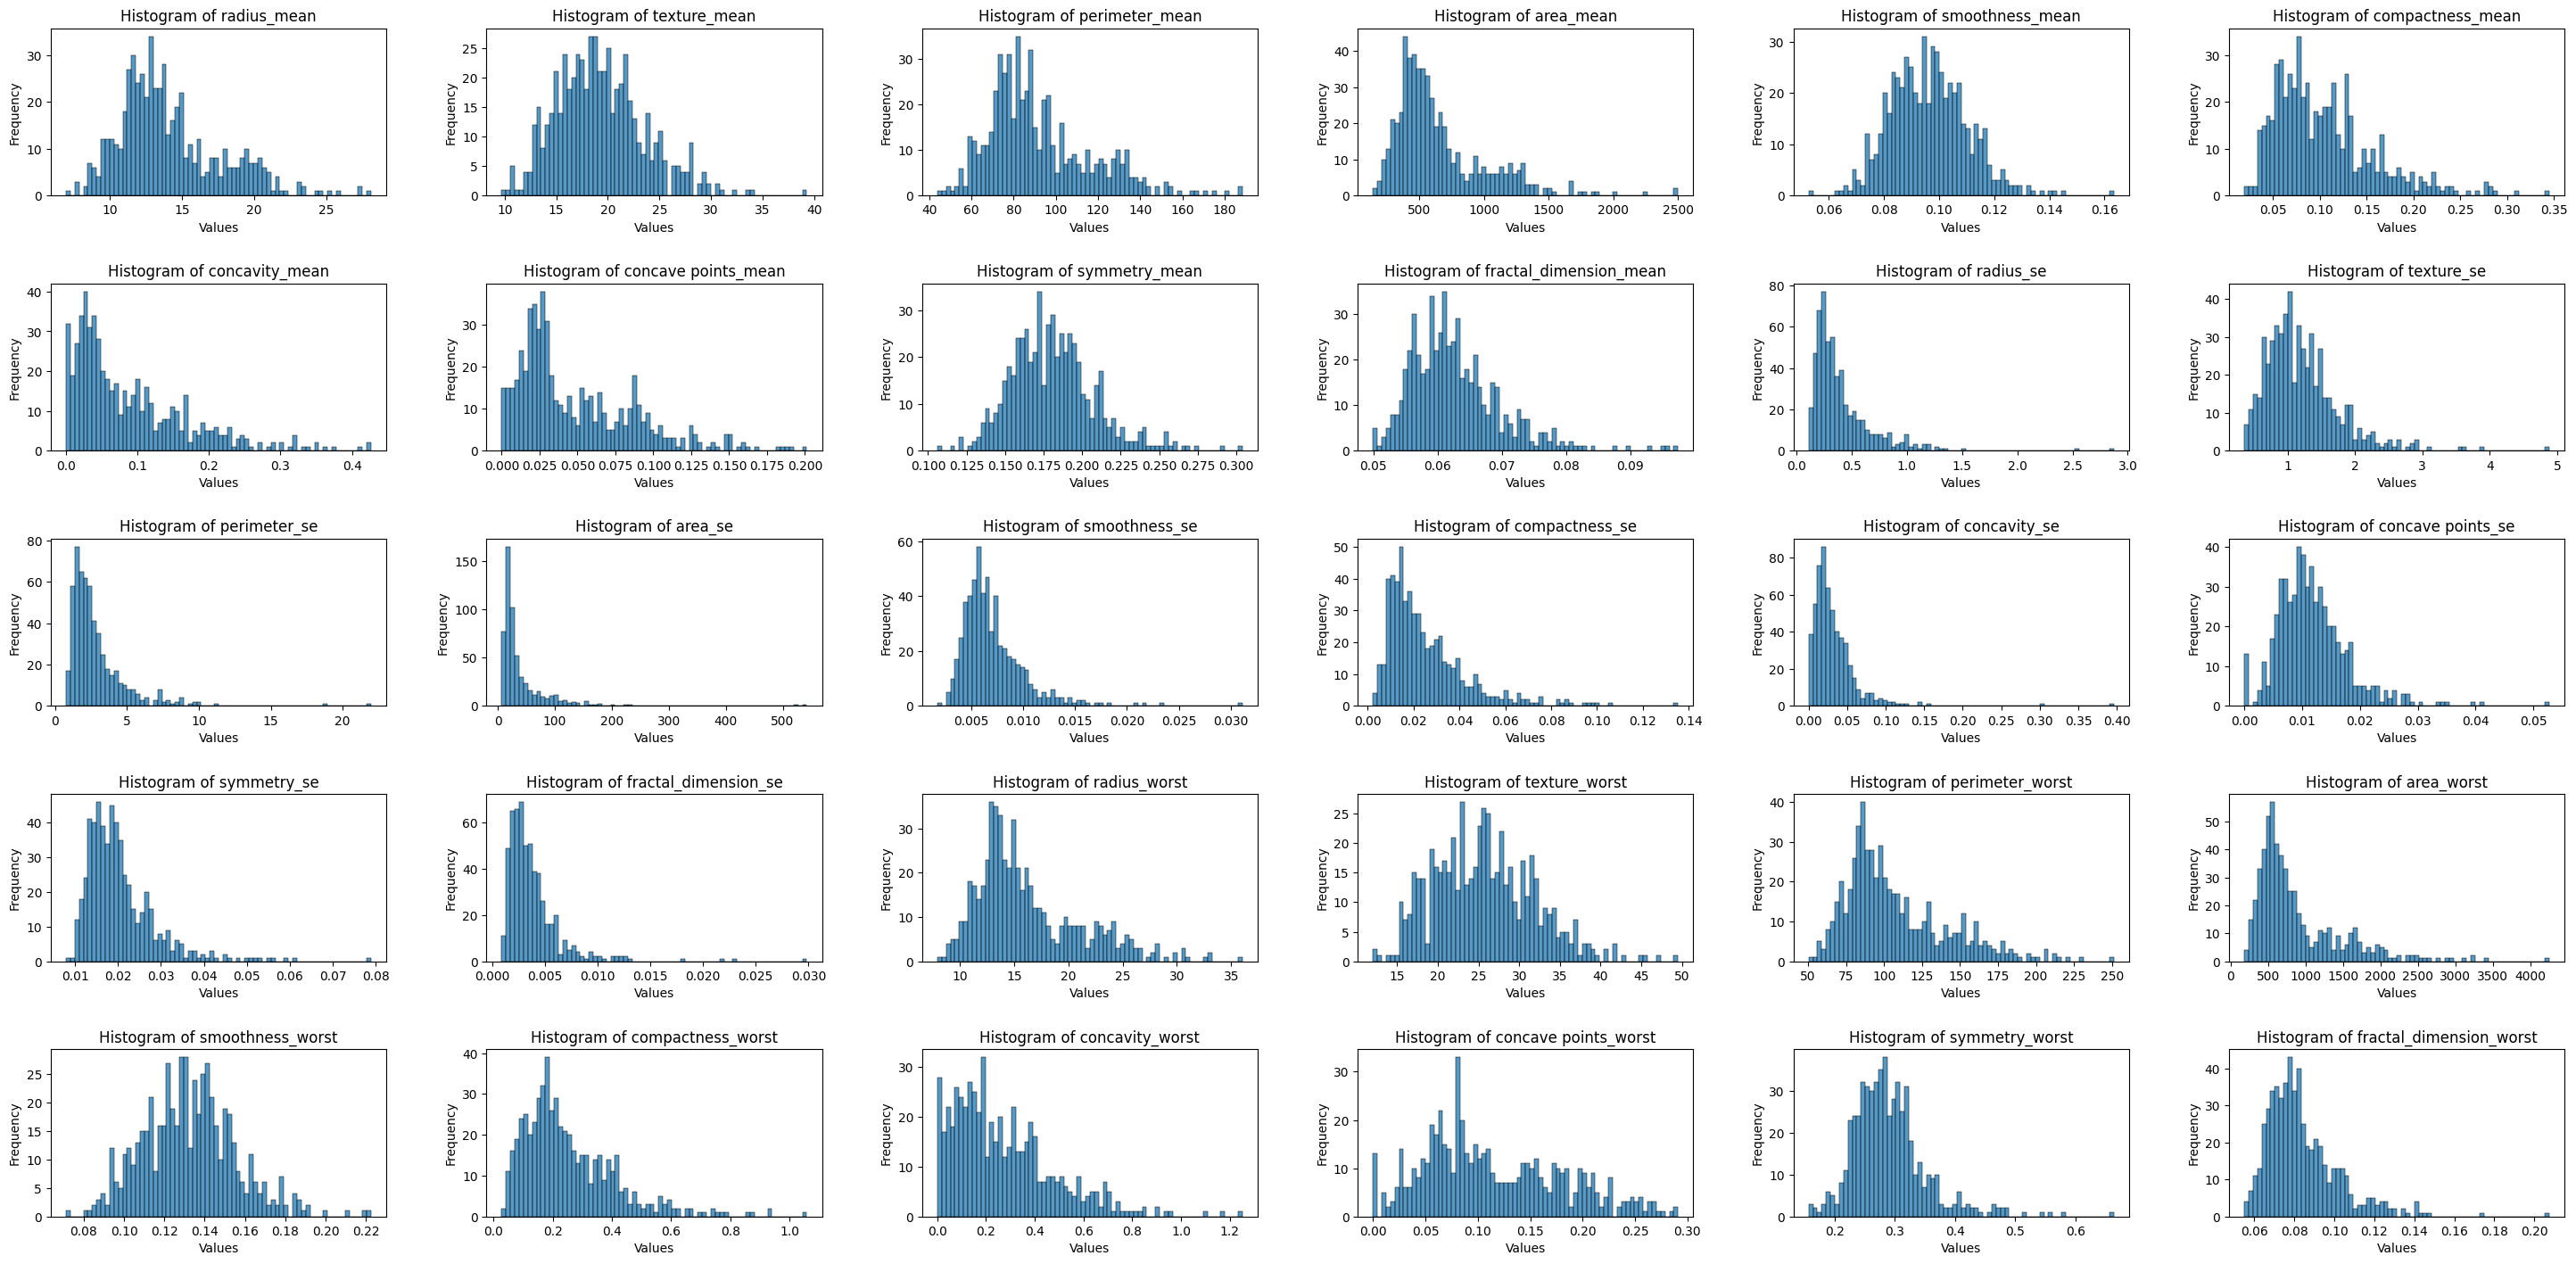

In [ ]:
# Showing the Histograms as a Grid Format
n_rows = 5
n_cols = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, column in enumerate(X.columns):
    if i < len(axes):
        sns.histplot(X[column], bins=70, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
    else:
        break
plt.show()

###  3.1. Normalization



In [ ]:
scaler = MinMaxScaler()
# Fit and transform the data to normalize each feature between 0 and 1
df_scaled = scaler.fit_transform(X)
column_titles = X.columns.tolist()
data = pd.DataFrame(df_scaled, columns=column_titles)
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [ ]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


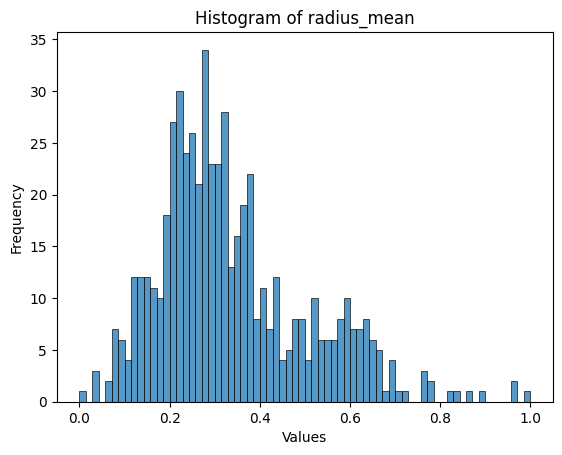

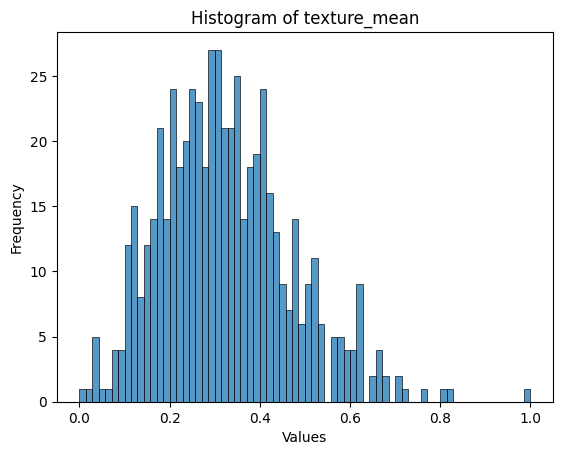

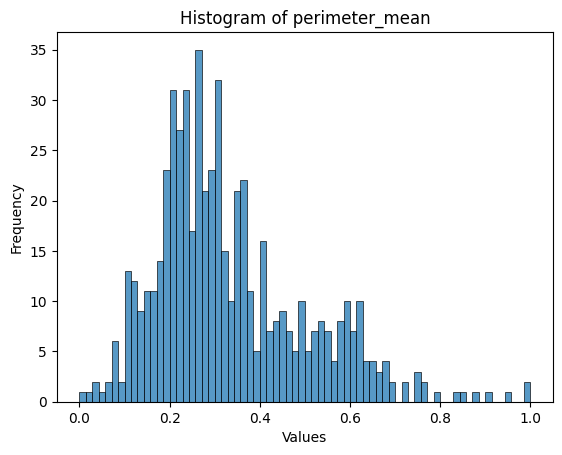

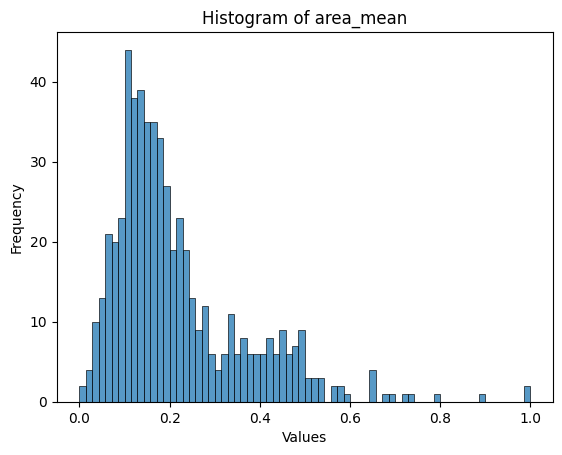

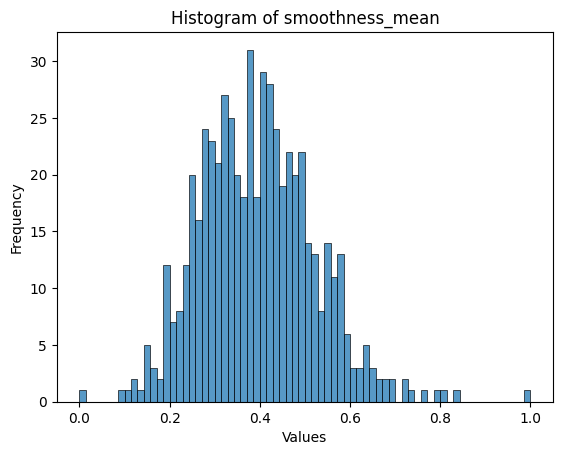

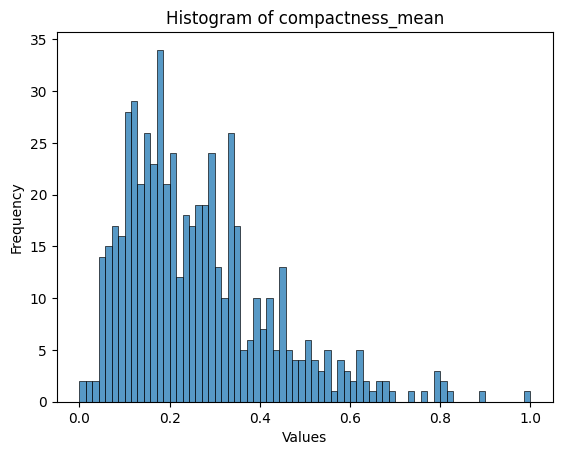

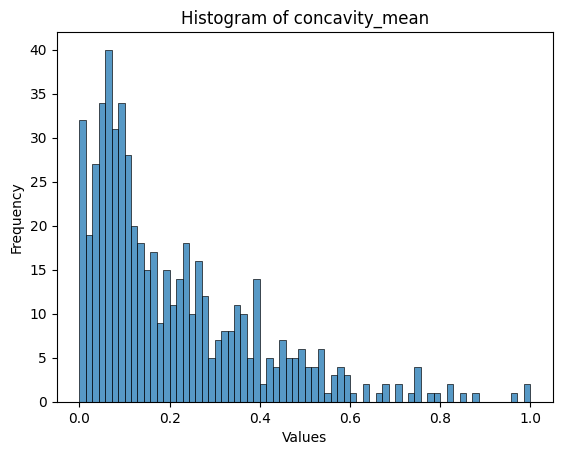

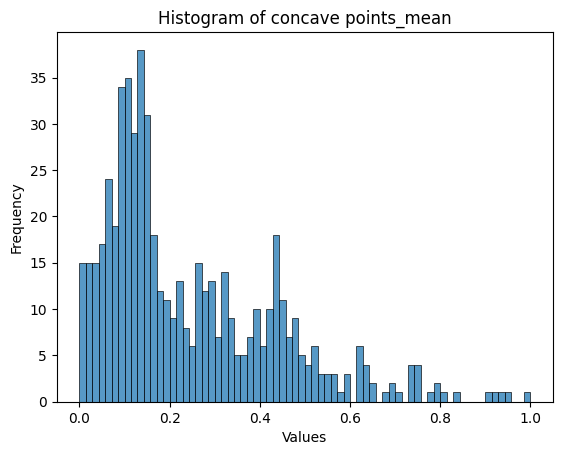

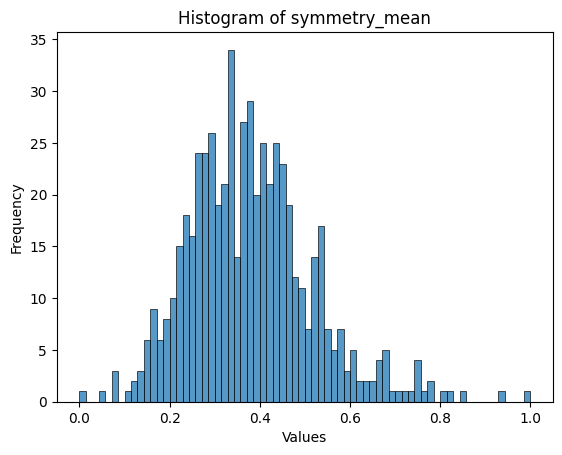

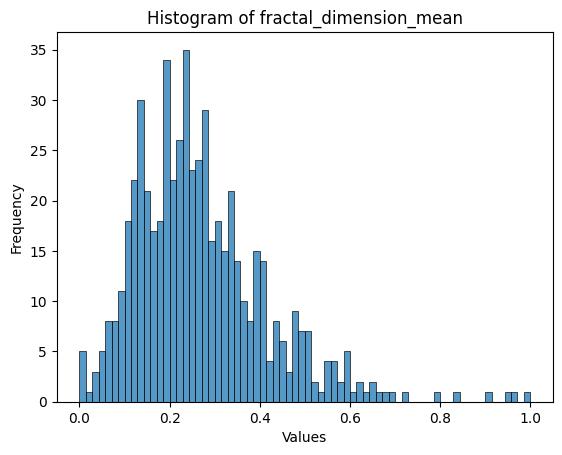

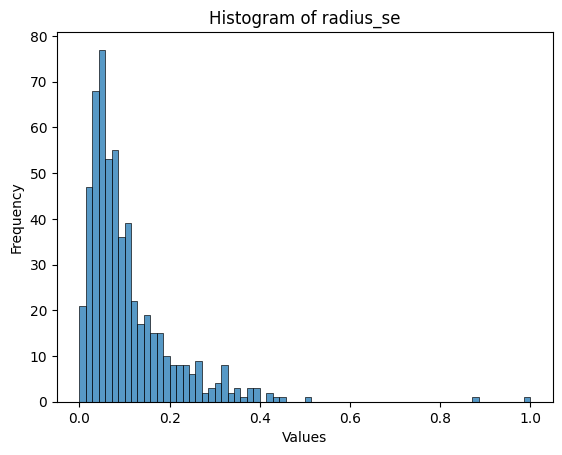

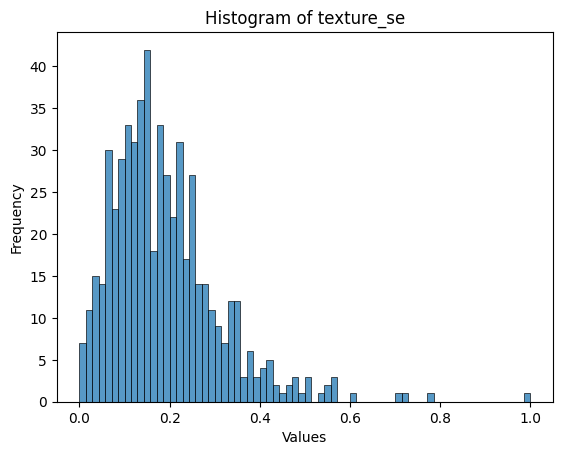

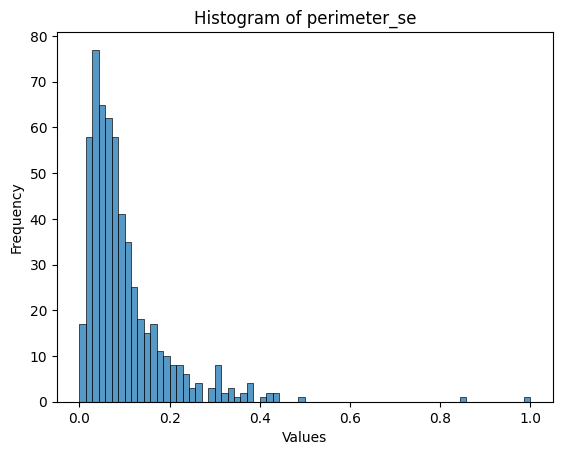

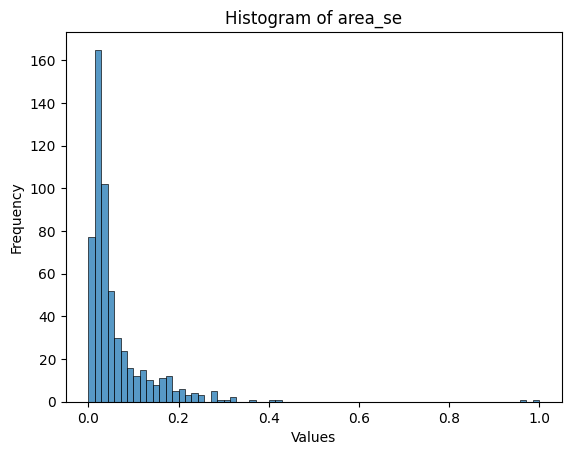

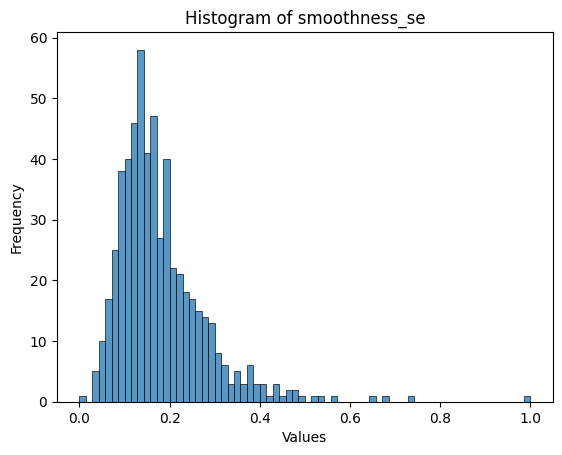

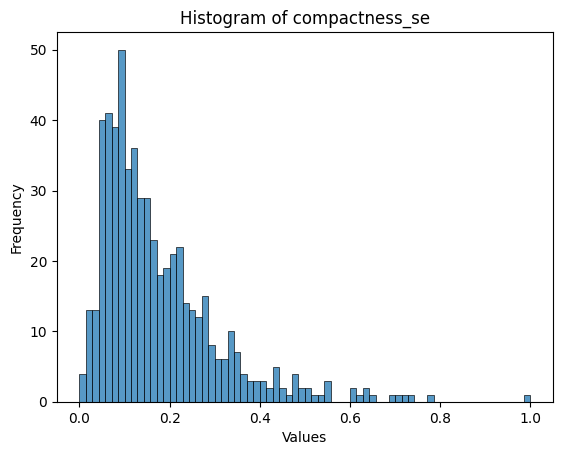

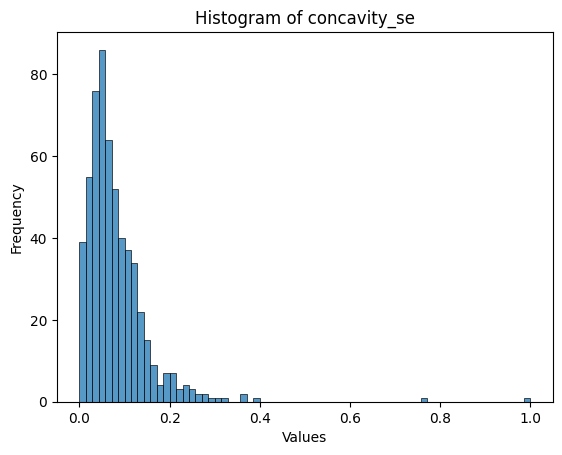

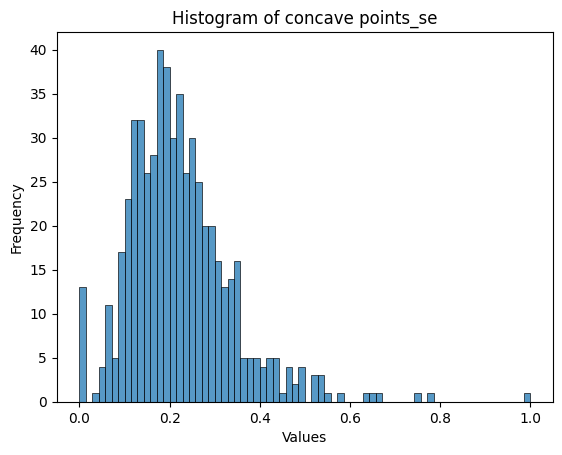

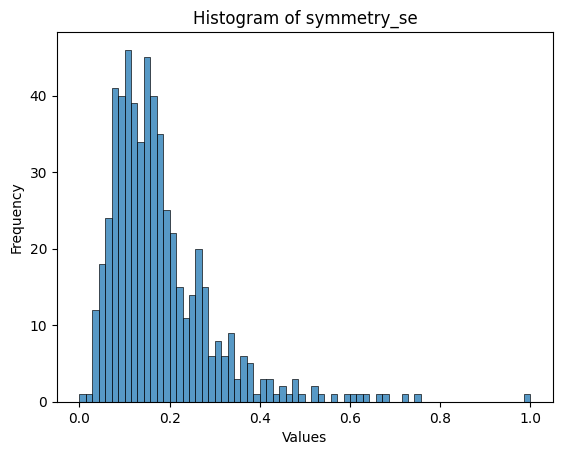

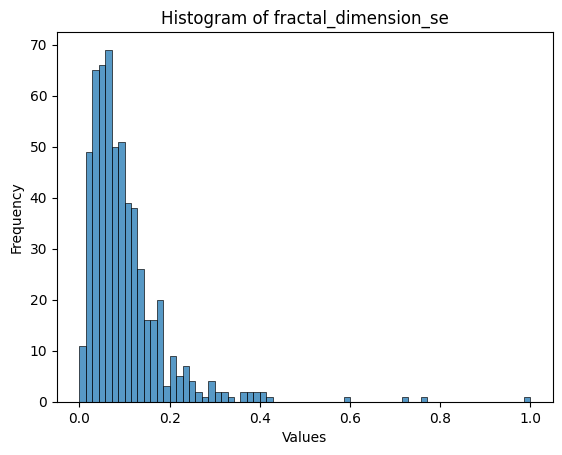

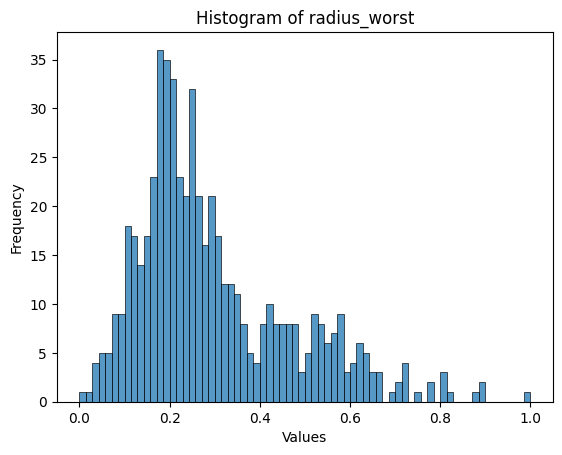

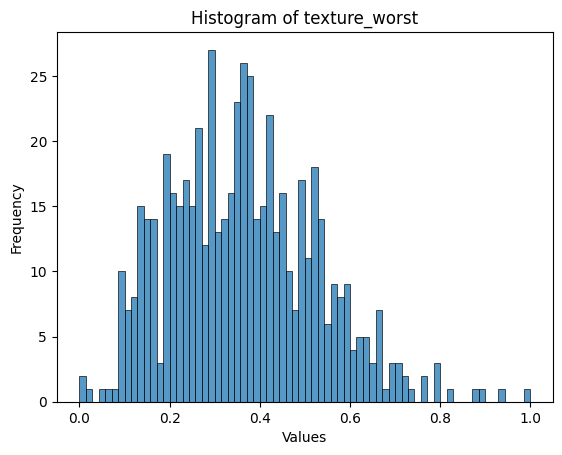

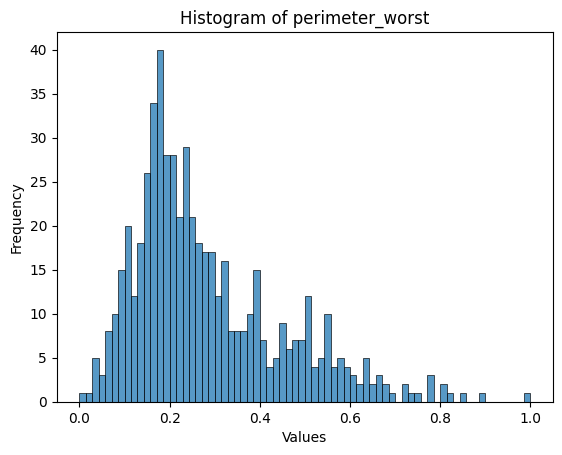

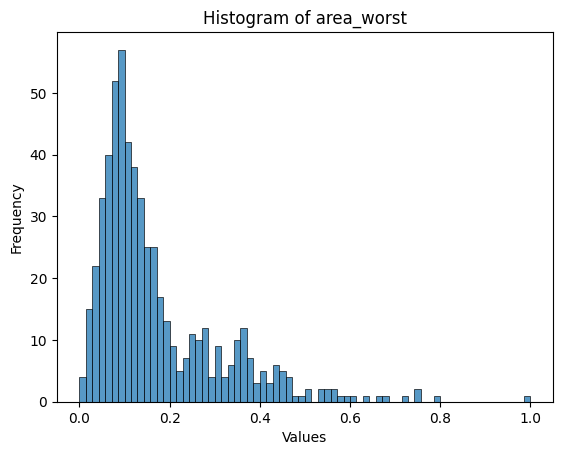

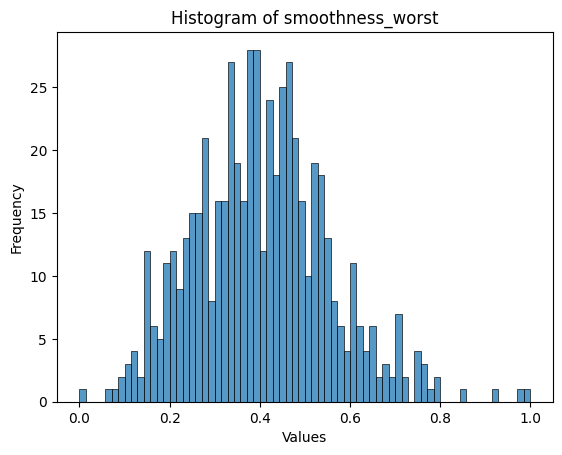

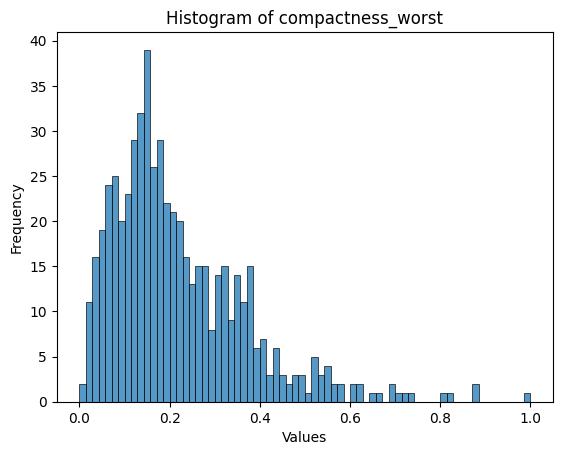

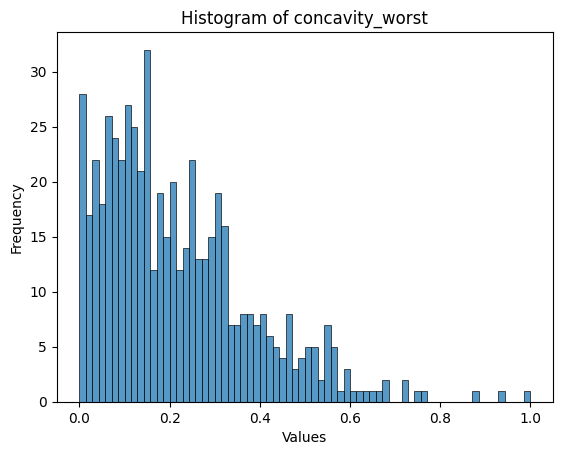

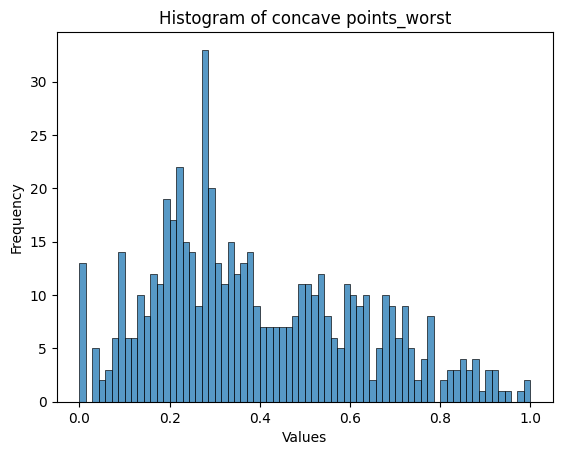

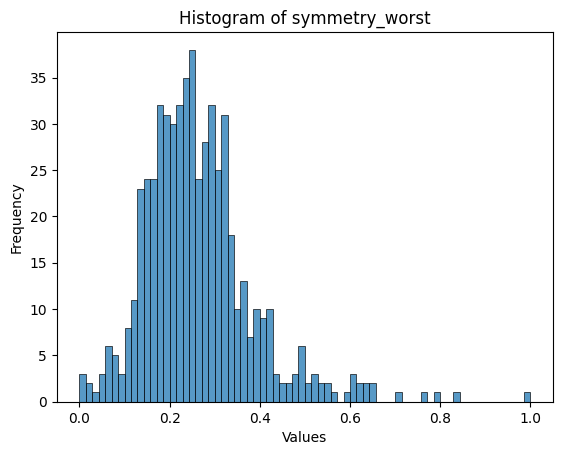

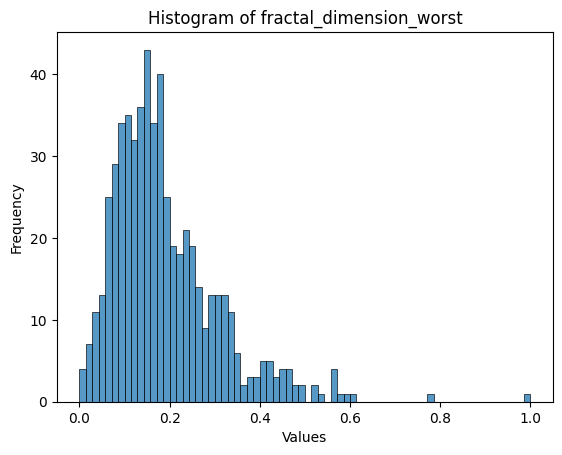

In [ ]:
for column in data.columns:
    sns.histplot(data[column], bins=70)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

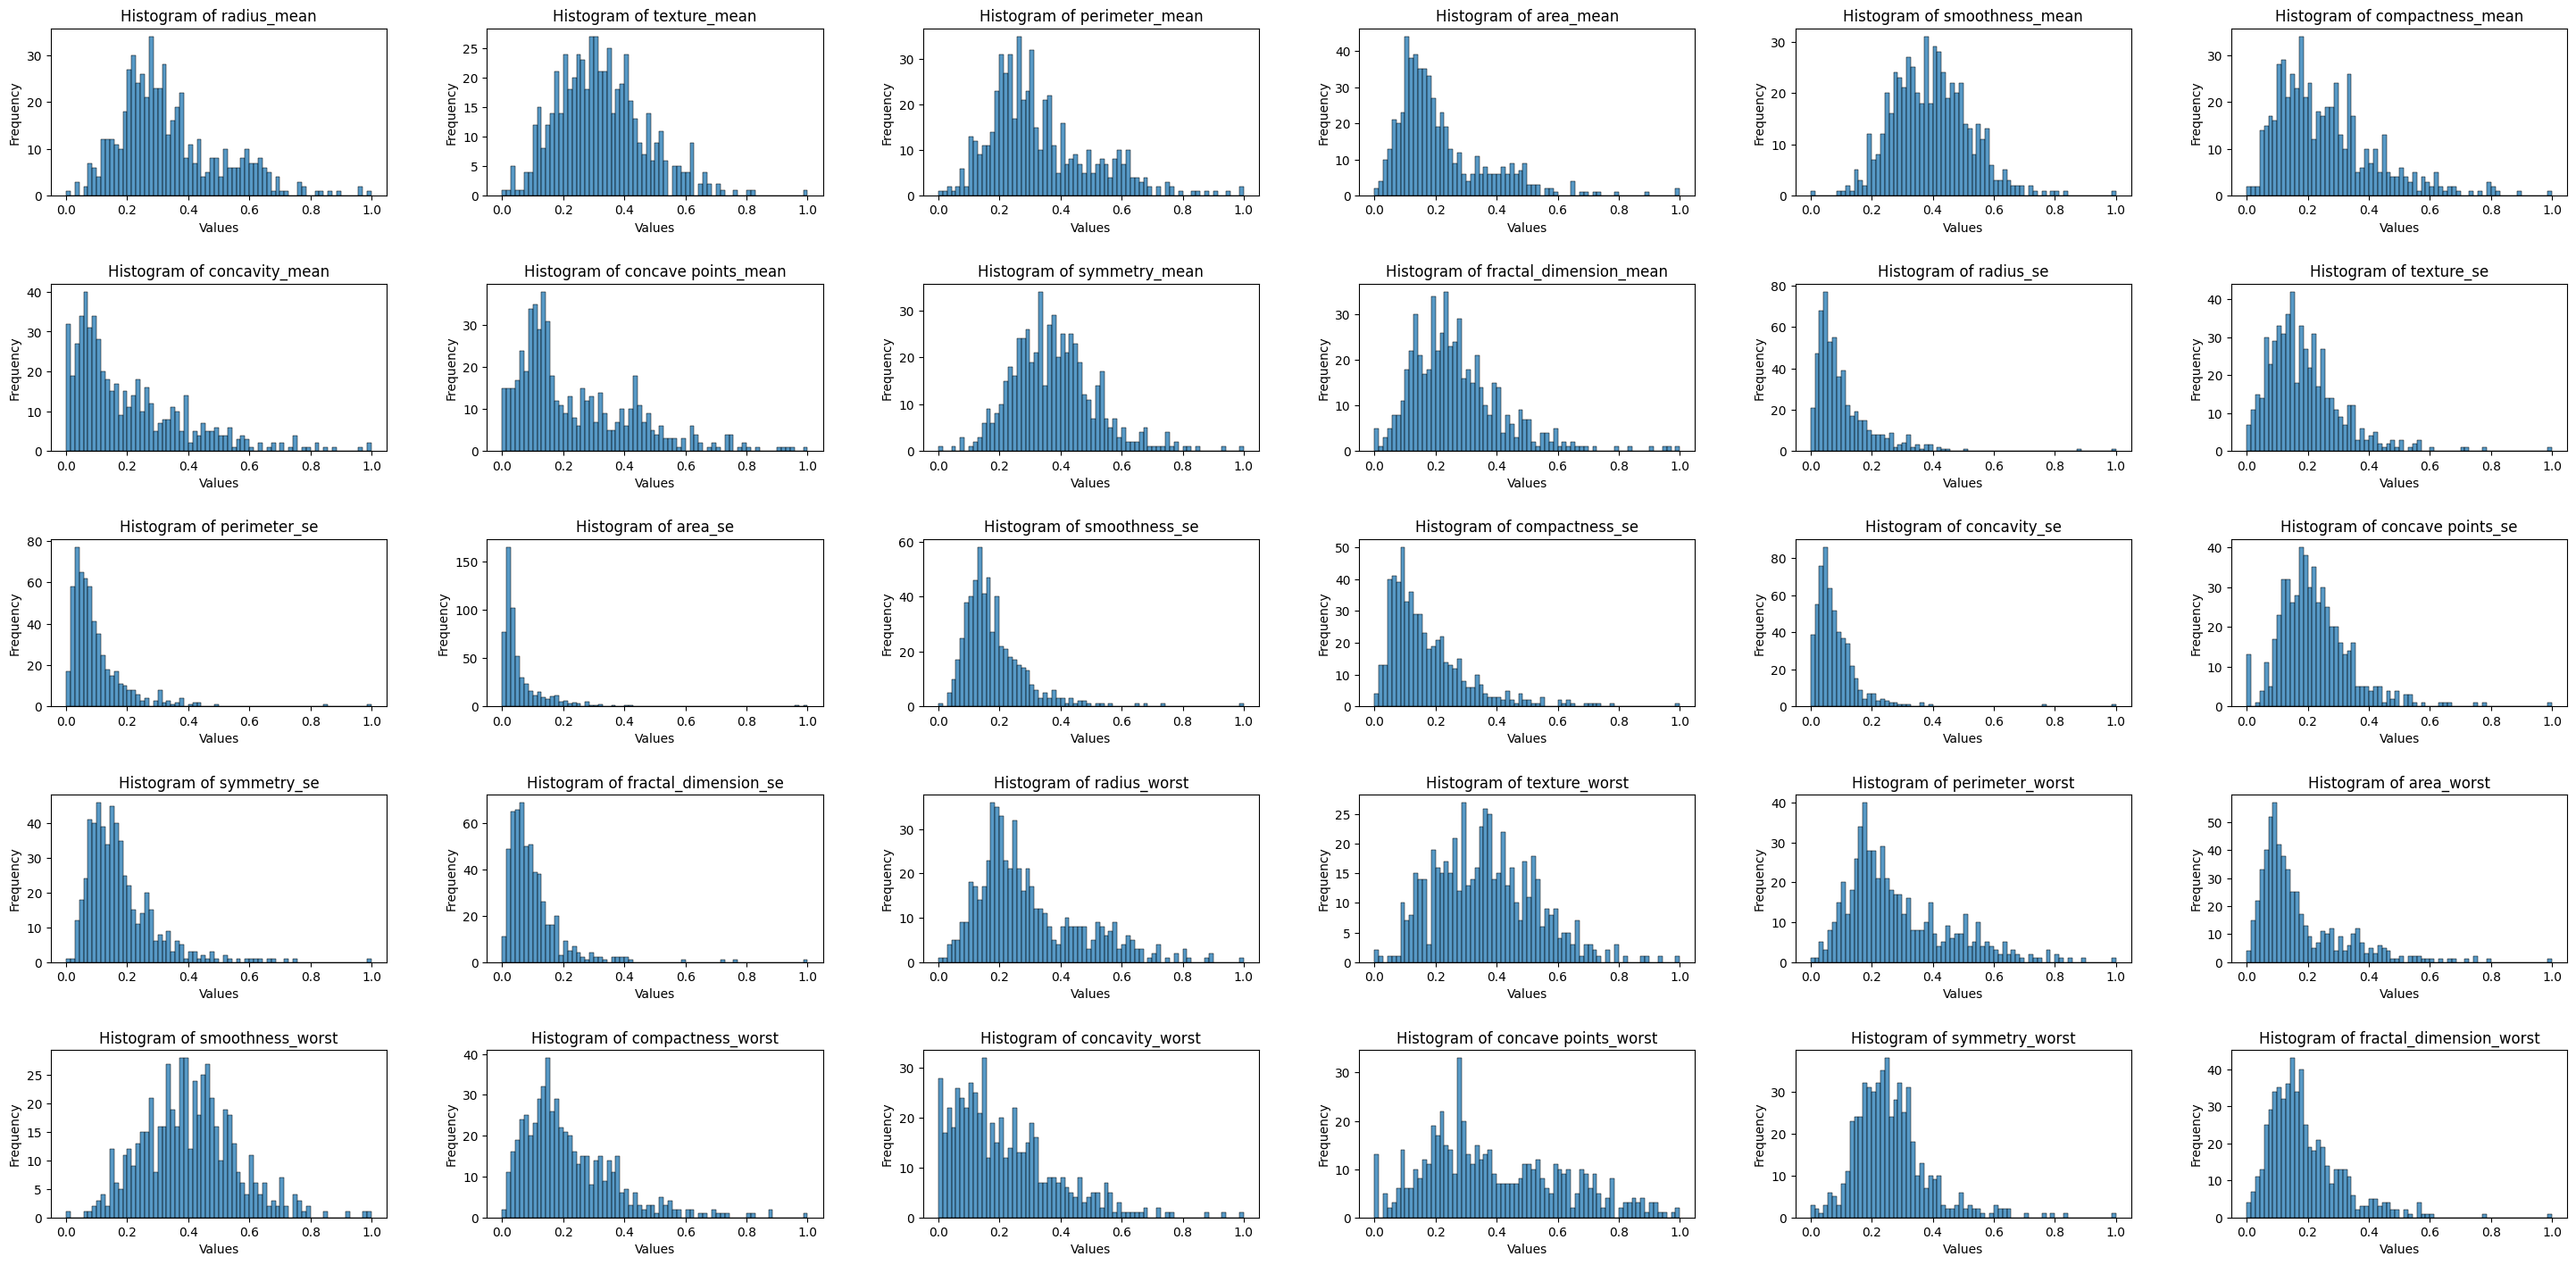

In [ ]:
# Showing the Histograms as a Grid Format
n_rows = 5
n_cols = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15))
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, column in enumerate(data.columns):
    if i < len(axes):
        sns.histplot(data[column], bins=70, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
    else:
        break
plt.show()

# 4.) K-means Clustering

### K-means Implemented Function

In [ ]:
# Manually implemented KMeans function
def custom_kmeans(data, k, max_iter=300, n_init=10, random_state=42):
    np.random.seed(random_state)

    # Randomly initialize centroids
    # This is done by selecting K-Unique Datapoints from the Dataset
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iter):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update centroids based on the mean of data points in each cluster
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])

        # If centroids don't change significantly, break
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Calculate the sum of squared errors (SSE)
    sse = np.sum([np.sum((data[labels == j] - centroids[j])**2) for j in range(k)])

    return labels, centroids, sse

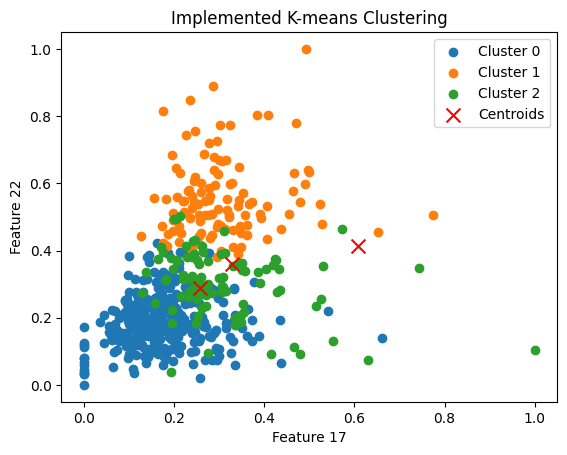

SSE = 187.03025264441408


In [ ]:
k = 3 # Number of clusters
labels, centroids, sse = custom_kmeans(df_scaled, k)

import random
a = random.randint(0,29)
b = random.randint(0,29)

# Step 2: Visualization
# Scatter plot for each cluster
for i in range(k):
    plt.scatter(df_scaled[labels == i, a], df_scaled[labels == i, b], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('Implemented K-means Clustering')
plt.xlabel(f'Feature {a}')
plt.ylabel(f'Feature {b}')
plt.legend()
plt.show()
print("SSE =", sse)

## No PCA

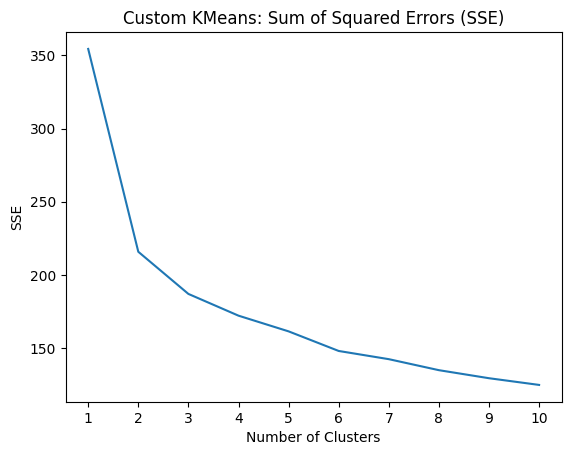

In [ ]:
# Create a list to hold SSE values for each k
sse_custom = []

# Iterate over different values of k
for k in range(1, 11):
    labels, centroids, sse = custom_kmeans(df_scaled, k)
    sse_custom.append(sse)

# Visualize results
plt.plot(range(1, 11), sse_custom)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Custom KMeans: Sum of Squared Errors (SSE)")
plt.show()


In [ ]:
temp = pd.DataFrame(sse_custom)
temp.head(10)

,0
0,354.436613
1,215.838320
2,187.030253
3,172.172287
4,161.445437
5,148.049740
6,142.450486
7,134.925103
8,129.431043
9,124.852063


In [ ]:
#find the elbow point programmatically
kl = KneeLocator(range(1, 11), sse_custom, curve="convex", direction="decreasing")
k_optimal = kl.elbow
k_optimal

3

In [ ]:
labels_custom, centroids_custom, sse_optimal= custom_kmeans(df_scaled, k_optimal)

# View cluster assignments for each observation
print("Cluster Assignments (custom implementation):", labels_custom)

# Print the centroid centers
print("Centroid Centers (custom implementation):")
print(centroids_custom)

# Print SSE for k=3
print(f"SSE for k=3: {sse_optimal}")

Cluster Assignments (custom implementation): [1 1 1 2 1 2 1 2 2 2 0 2 1 0 2 2 0 2 1 0 0 0 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2
 0 0 2 0 2 1 2 2 1 0 2 0 0 0 0 0 1 0 0 1 2 0 0 0 0 2 0 2 2 0 0 2 0 1 0 2 0
 0 1 0 1 1 0 0 2 1 1 0 1 0 1 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0
 0 2 0 0 0 0 2 2 0 0 1 1 0 0 0 0 1 2 1 0 2 2 0 1 0 0 0 2 0 0 0 0 0 0 0 2 0
 0 0 0 2 2 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 2 0 0 0 2 2 0 0 1 1 0 0 0
 0 1 0 0 0 2 0 0 2 2 0 2 0 1 2 0 1 1 2 0 0 0 0 2 0 1 0 1 2 2 2 0 0 1 1 0 0
 0 2 0 0 0 0 0 2 2 0 0 1 0 0 1 1 0 1 0 0 2 0 1 0 0 2 0 0 1 0 1 1 1 2 1 2 2
 2 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 1 0 0 0 0 2 2 2 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 2 1 2 0 0 2 0 0 0 0 0 0 0 0 1 1 0 1 1
 2 0 1 1 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 2 0 1 1 0 2 0 0 0 0 2 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1 2 0 

In [ ]:
# Append cluster assignments to the original DataFrame
df_with_clusters = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_with_clusters['Cluster'] = labels_custom

# View the updated DataFrame
print("Updated DataFrame with Cluster Assignments:")
print(df_with_clusters.head(20))

Updated DataFrame with Cluster Assignments:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          M        17.99         10.38          122.80     1001.0   
1          M        20.57         17.77          132.90     1326.0   
2          M        19.69         21.25          130.00     1203.0   
3          M        11.42         20.38           77.58      386.1   
4          M        20.29         14.34          135.10     1297.0   
5          M        12.45         15.70           82.57      477.1   
6          M        18.25         19.98          119.60     1040.0   
7          M        13.71         20.83           90.20      577.9   
8          M        13.00         21.82           87.50      519.8   
9          M        12.46         24.04           83.97      475.9   
10         M        16.02         23.24          102.70      797.8   
11         M        15.78         17.89          103.60      781.0   
12         M        19.17         24.80       

## PCA

### PCA Function

In [ ]:
###PCA###
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.componentsT = None
        self.mean = None
        self.eigenvalues = []
        self.slected_eigenvalues = []
        self.eigenvectors = None

    def fit(self, X):
      # mean centering
      self.mean = np.mean(X, axis=0)
      X = X -  self.mean

      # covariance, functions needs samples as columns
      cov = np.cov(X.T)

      # eigenvectors, eigenvalues
      self.eigenvalues, self.eigenvectors = np.linalg.eig(cov)

      # eigenvectors v = [:, i] column vector, transpose this for easier calculations
      self.eigenvectors = self.eigenvectors.T

      # sort eigenvectors
      idxs = np.argsort(self.eigenvalues)[::-1]
      self.eigenvalues = self.eigenvalues[idxs]
      self.eigenvectors = self.eigenvectors[idxs]

      self.components = self.eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X,self.components.T)

    def explained_variance_ratio (self):
      return self.eigenvalues / np.sum(self.eigenvalues)

    def explained_variance_ratio_selectecd_pca (self):
      return self.slected_eigenvalues / np.sum(self.slected_eigenvalues)

    def select_PCA(self,n):
      self.components = n
      self.slected_eigenvalues = self.eigenvalues[:self.n_components]
      self.components = self.eigenvectors[:self.n_components]


Shape of X: (569, 30)
Shape of transformed X: (569, 2)


<ipython-input-23-552d73299791>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=colors, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 2)


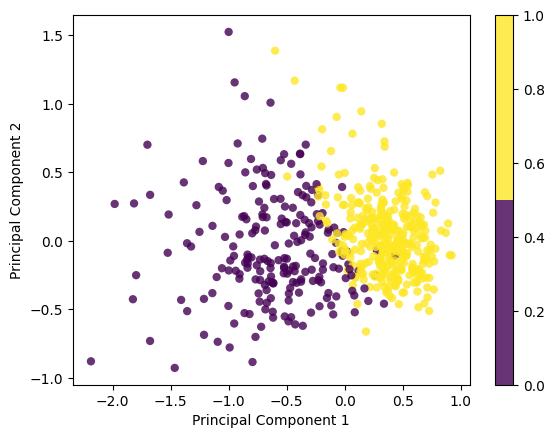

In [ ]:
# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(df_scaled)
X_projected = pca.transform(df_scaled)

print("Shape of X:", df_scaled.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

color_mapping = {'M': 0, 'B': 1}
colors = [color_mapping[label] for label in y]


plt.scatter(
    x1, x2, c=colors, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 2)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

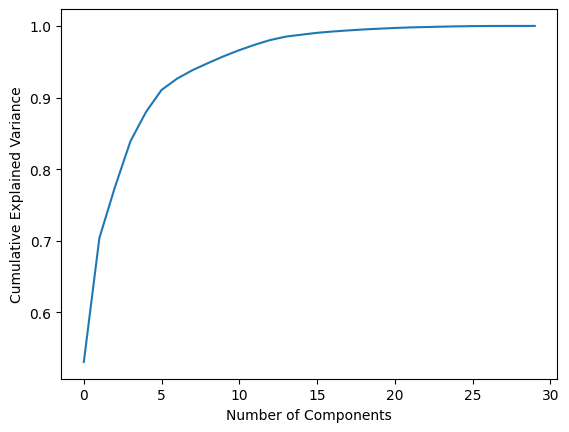

In [ ]:
explained_var_ratio = pca.explained_variance_ratio()
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
# Project the data onto the 2 primary principal components
pca2 = PCA(3)
pca2.fit(df_scaled)
X_projected2 = pca2.transform(df_scaled)

print("Shape of X:", df_scaled.shape)
print("Shape of transformed X:", X_projected2.shape)

x1_2 = X_projected2[:, 0]
x2_2 = X_projected2[:, 1]

color_mapping = {'M': 0, 'B': 1}



Shape of X: (569, 30)
Shape of transformed X: (569, 3)


In [ ]:
column_titles = ['Feature1', 'Feature2','Feature3']
df_projected = pd.DataFrame(X_projected2, columns=column_titles)
df_projected.head()

,Feature1,Feature2,Feature3
0,-1.387021,0.426895,-0.541703
1,-0.462308,-0.556947,-0.205175
2,-0.954621,-0.109701,-0.147848
3,-1.000816,1.525089,-0.053271
4,-0.626828,-0.302471,-0.409336


In [ ]:
df_projected['target']=y
df_projected.head()

,Feature1,Feature2,Feature3,target
0,-1.387021,0.426895,-0.541703,M
1,-0.462308,-0.556947,-0.205175,M
2,-0.954621,-0.109701,-0.147848,M
3,-1.000816,1.525089,-0.053271,M
4,-0.626828,-0.302471,-0.409336,M


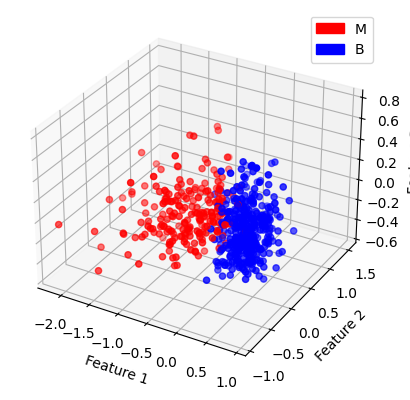

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming df_projected is your DataFrame containing the data

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extracting features for plotting
x = df_projected['Feature1']
y = df_projected['Feature2']
z = df_projected['Feature3']

# Use Seaborn to define colors based on 'target'
colors = df_projected['target'].map({'M': 'red', 'B': 'blue'})

# Plotting the 3D scatter plot with Matplotlib
ax.scatter(x, y, z, c=colors, marker='o')

# Set labels for axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Create a legend for the 'M' and 'B' categories
import matplotlib.patches as mpatches
M_patch = mpatches.Patch(color='red', label='M')
B_patch = mpatches.Patch(color='blue', label='B')
plt.legend(handles=[M_patch, B_patch])

plt.show()


### K-means w/ PCA

In [ ]:
# Project the data onto the 2 primary principal components
pca_kmeans = PCA(2)
pca_kmeans.fit(df_scaled)
X_projected_kmeans = pca_kmeans.transform(df_scaled)

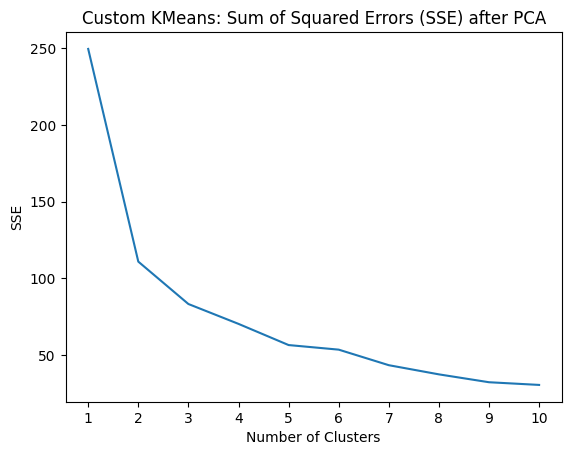

In [ ]:
# Create a list to hold SSE values for each k
sse_custom_PCA = []

# Iterate over different values of k
for k in range(1, 11):
    labels, centroids, sse = custom_kmeans(X_projected_kmeans, k)
    sse_custom_PCA.append(sse)

# Visualize results
plt.plot(range(1, 11), sse_custom_PCA)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Custom KMeans: Sum of Squared Errors (SSE) after PCA")
plt.show()

In [ ]:
temp = pd.DataFrame(sse_custom_PCA)
temp.head(10)

,0
0,249.456667
1,110.971509
2,83.371971
3,70.435200
4,56.645198
5,53.659692
6,43.533109
7,37.564503
8,32.438924
9,30.690678


In [ ]:
#find the elbow point programmatically
k2 = KneeLocator(range(1, 11), sse_custom, curve="convex", direction="decreasing")
k_optimal_PCA = k2.elbow
k_optimal_PCA

3

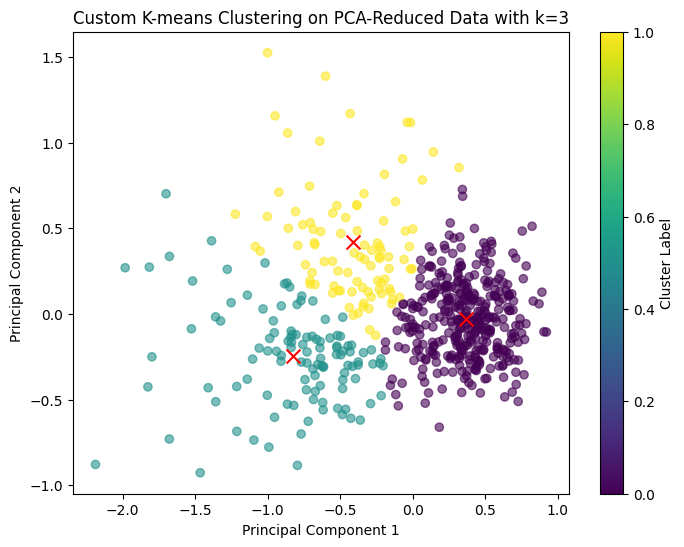

SSE = 83.37197137033976


In [ ]:
# Apply custom_kmeans on the PCA-reduced data
k = k_optimal_PCA # Specify the number of clusters
labels_PCA, centroids_PCA, sse_PCA = custom_kmeans(X_projected_kmeans, k)

# Visualization of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_projected_kmeans[:, 0], X_projected_kmeans[:, 1], c=labels_PCA, cmap='viridis', alpha=0.6)
plt.scatter(centroids_PCA[:, 0], centroids_PCA[:, 1], c='red', marker='x', s=100)  # Plotting centroids

plt.title(f'Custom K-means Clustering on PCA-Reduced Data with k={k}')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()
print("SSE =", sse_PCA)

#5.) Comparison

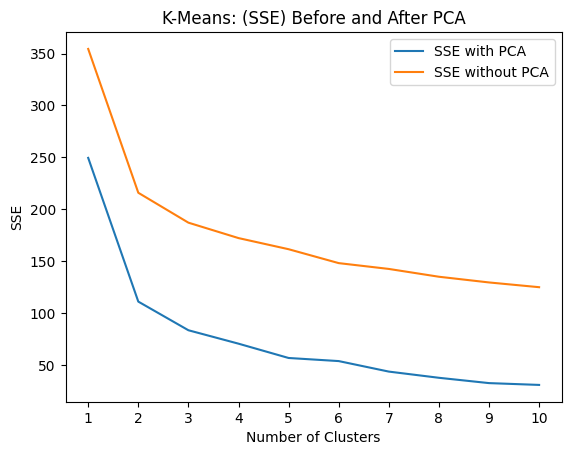

In [ ]:
# Visualize results
plt.plot(range(1, 11), sse_custom_PCA, label='SSE with PCA')
plt.plot(range(1, 11), sse_custom, label='SSE without PCA')

plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("K-Means: (SSE) Before and After PCA")

# Display the legend
plt.legend()

plt.show()

In [ ]:
sse_pca_df = pd.DataFrame(sse_custom_PCA, columns=['SSE (K-Means)'])
sse_df = pd.DataFrame(sse_custom, columns=['SSE (K-Means with PCA)'])
comparison_df = pd.concat([sse_df, sse_pca_df], axis=1)
comparison_df.head(10)

,SSE (K-Means with PCA),SSE (K-Means)
0,354.436613,249.456667
1,215.838320,110.971509
2,187.030253,83.371971
3,172.172287,70.435200
4,161.445437,56.645198
5,148.049740,53.659692
6,142.450486,43.533109
7,134.925103,37.564503
8,129.431043,32.438924
9,124.852063,30.690678
